In [10]:
import pandas as pd
import numpy as np

In [14]:
# clustered dataset
df = pd.read_csv("datasets/dataset_pisa_clustered.csv")

# Ignoring outliers
df = df[df.cluster != -1]

# Setting index
df = df.set_index("Unnamed: 0")

## Manual merging

In [ ]:
# Clusters 13, 14 and 15 are all from camposanto monumentale
df['cluster'] = df['cluster'].replace(14, 13)
df['cluster'] = df['cluster'].replace(15, 13)

# Clusters 21, 22 and 23 are all the cattedrali
df['cluster'] = df['cluster'].replace(22, 21)
df['cluster'] = df['cluster'].replace(23, 21)

# Clusters 24 and 25 are both inside the tower
df['cluster'] = df['cluster'].replace(25, 24)

## Centroid based merging

In [27]:
# Calculating centroids
lat = df.groupby('cluster')['lat'].apply(lambda x: np.mean(x, axis=0))
lon = df.groupby('cluster')['lon'].apply(lambda x: np.mean(x, axis=0))
centroids = pd.concat([lat, lon], axis=1)

In [ ]:
# Plotting
centroids.plot.scatter(x='lon', y='lat')

<Axes: xlabel='cluster'>

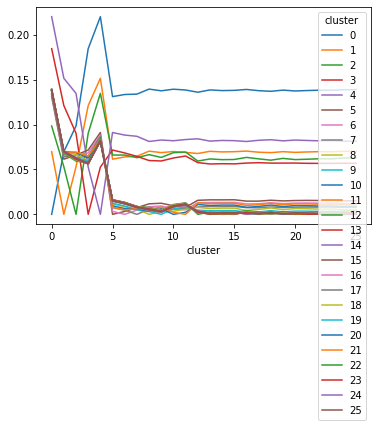

In [46]:
# Calculate the distance between each centroid
dist_matrix = pd.DataFrame(index=centroids.index, columns=centroids.index)
for i in centroids.index:
    for j in centroids.index:
        dist_matrix.loc[i, j] = np.sqrt((centroids.loc[i, 'lat'] - centroids.loc[j, 'lat'])**2 + (centroids.loc[i, 'lon'] - centroids.loc[j, 'lon'])**2)

dist_matrix.plot()

## Semantic based merging